In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [9]:
kmeans.cluster_centers_[:, 3]

array([10.11049724,  8.73148148,  0.0326087 ,  1.15934066,  4.83009709,
        7.29032258,  0.27108434, 11.10465116,  4.21111111,  4.02232143])

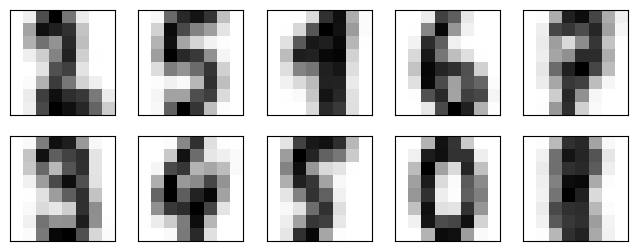

In [45]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [75]:
# predicting labels from kmeans with the true labels

from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [82]:
clusters.shape

(1797,)

In [181]:
mapping = {}
for i in range(10):
    indices = (clusters == i)
    actuals = digits.target[indices]
    mode_i = mode(actuals)[0]
    mapping[i] = mode_i

labels = np.vectorize(mapping.get)(clusters)

In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

Text(113.9222222222222, 0.5, 'predicted label')

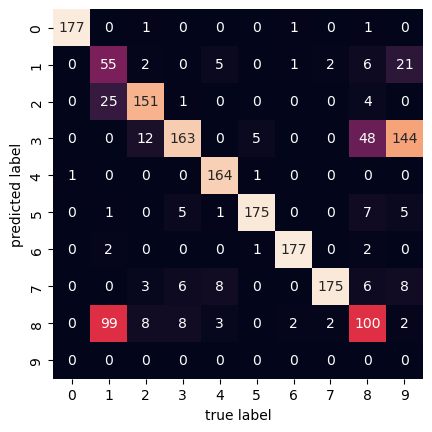

In [183]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Using t-SNE

In [184]:
from sklearn.manifold import TSNE

In [186]:
# projecting the data 

tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

In [190]:
# compute the clusters

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# mapping the cluster labels to true labels

mapping = {}
for i in range(10):
    indices = (clusters == i)
    actuals = digits.target[indices]
    mode_i = mode(actuals)[0]
    mapping[i] = mode_i

labels = np.vectorize(mapping.get)(clusters)

In [191]:
# compute the accuracy

accuracy_score(digits.target, labels)

0.9410127991096272